In [1]:
# Inicialização

import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import serial
import time
import scipy.signal as sig
import pandas as pd

from matplotlib import animation, rc
from IPython.display import HTML

import scipy.optimize as opt

%matplotlib notebook

# 1ª Semana

## Configuração do espectrómetro, e da interface com o computador
O espectrómetro a utilizar é um Hamamatsu C12880MA, montado numa placa produzida pelo INESCTEC, semelhante a uma placa do fabricante. O controlo/interface é através de um Arduino UNO. Assim, o primeiro passo foi programar o Arduino para essa tarefa, utilizando código retirado de https://github.com/groupgets/c12880ma, o qual modificámos ligeiramente para reduzir ao mínimo o tempo de integração, uma vez que o espectrómetro facilmente fica saturado com a luz ambiente. Para mitigar este problema, utilizamos uma fibra ótica, que não só reduz a quantidade de luz a entrar para o espectrómetro, como também permite direcionar a medição para apenas uma fonte, reduzindo o problema do ruído.

Para análise dos dados, optámos por utilizar o Python/Jupyter Notebook. Para importar os dados do Arduino, utilizamos a "serial interface", que disponibilizamos ao Python utilizando a biblioteca "pyserial". Escrevemos código para permitir a visualização em tempo real do espectro, que está no notebook "EspectrometroRecolha.ipynb".

# 2ª Semana

Começámos por tentar medir o espectro das lâmpadas de iluminação (lâmpadas de mercúrio), mas apercebemo-nos que seria necessário fazer uma calibração ao espectrómetro, dado que de fábrica, não vinha calibrado, e não tínhamos acesso a nenhuma calibração.

Para tal, começámos por utilizar um LED RGB, para obtermos uma calibração inicial, a partir da qual poderíamos fazer uma melhor.

## Calibração com LED

<IPython.core.display.Javascript object>


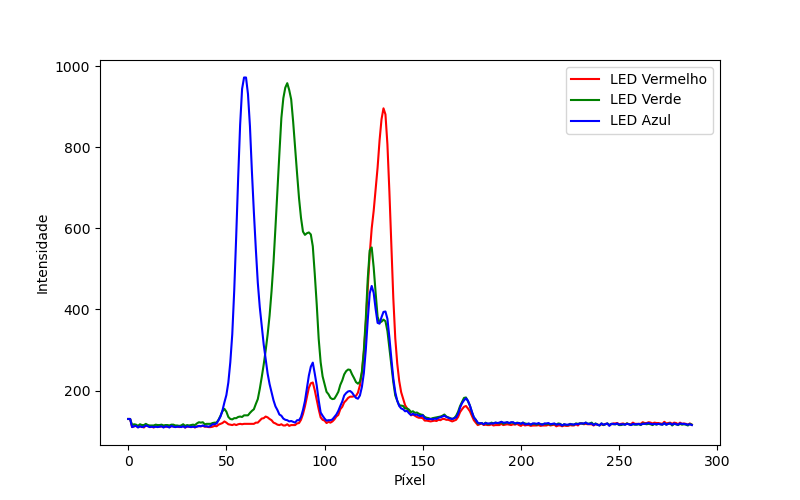

In [2]:
valRed = np.loadtxt("../Data/RedLED")
valGreen = np.loadtxt("../Data/GreenLED")
valBlue = np.loadtxt("../Data/BlueLED")
pix = np.arange(0,288)

plt.figure(figsize=(8,5))
plt.plot(pix,valRed,'r',label="LED Vermelho")
plt.plot(pix,valGreen,'g',label="LED Verde")
plt.plot(pix,valBlue,'b',label="LED Azul")
plt.legend()
plt.xlabel("Píxel")
plt.ylabel("Intensidade")
plt.show()

In [3]:
maximumRed = sig.find_peaks(valRed, prominence = 25)
maximumGreen = sig.find_peaks(valGreen, prominence = 25)
maximumBlue = sig.find_peaks(valBlue, prominence = 25)

print("Índices dos máximos detetados")
print(maximumRed[0])
print(maximumGreen[0])
print(maximumBlue[0])

Índices dos máximos detetados
[ 94 130 172]
[ 49  81 112 124 172]
[ 59  94 124 131 172]


Os picos em que estamos interessados são:
* Píxel 130 para o LED Vermelho
* Píxel 81 para o LED Verde
* Píxel 59 para o LED Azul

É de notar que todos os espectros têm um pico na zona do vermelho. Isto deve-se a um LED vermelho no próprio Arduino, que não conseguímos desligar, e que introduziu ruído. Para medições posteriores, mitigámos estes problema com a fibra ótica, e cobrindo esse LED.

Para o ajuste, temos também de usar, como primeira aproximação, que o píxel 0 e o 288 (o último) correspondem aos valores fornecidos na datasheet do espectrómetro como o mínimo e o máximo. Assim, obtemos:

339.6591936382159 + 2.2525224953975984·x¹ + 0.0005496771640523106·x² -
7.702919915417408e-06·x³


<IPython.core.display.Javascript object>


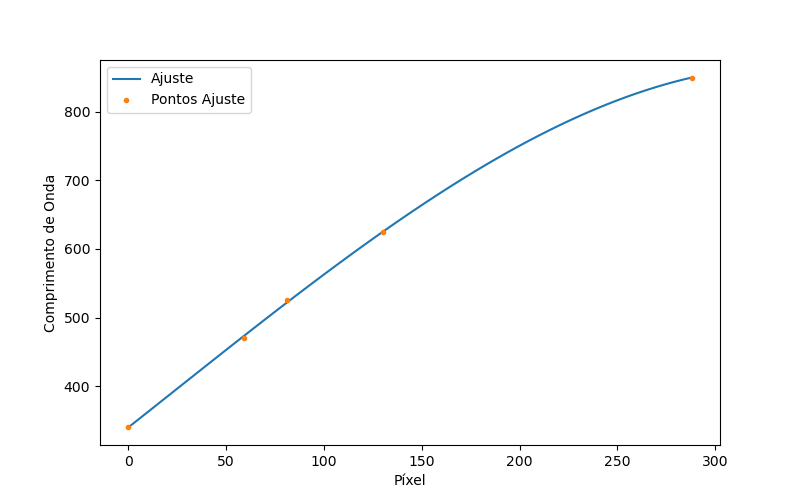

In [4]:
LEDpixelMax = (59,81,130,288,0)
LEDwavelenght = (470,525,624,850,340)
deg= 3

aj= np.polyfit(LEDpixelMax,LEDwavelenght,deg)[::-1]
ajLED = np.polynomial.polynomial.Polynomial( aj )
print(ajLED)

nx = np.linspace(0,288,100)
plt.figure(figsize=(8,5))
plt.plot(nx,ajLED(nx),label="Ajuste")
plt.plot(LEDpixelMax,LEDwavelenght,'.',label="Pontos Ajuste")
plt.xlabel("Píxel")
plt.ylabel("Comprimento de Onda")
plt.legend()
plt.show()

# 3ª Semana

## Medição das lâmpadas de iluminação (mercúrio)
Por sugestão do docente, tentámos utlizar o espectro das lâmpadas de iluminação, que sabiamos serem de mercúrio, para obter riscas de emissão com comprimentos de onda conhecidos, que poderíamos utilizar para um ajuste melhor.

<IPython.core.display.Javascript object>


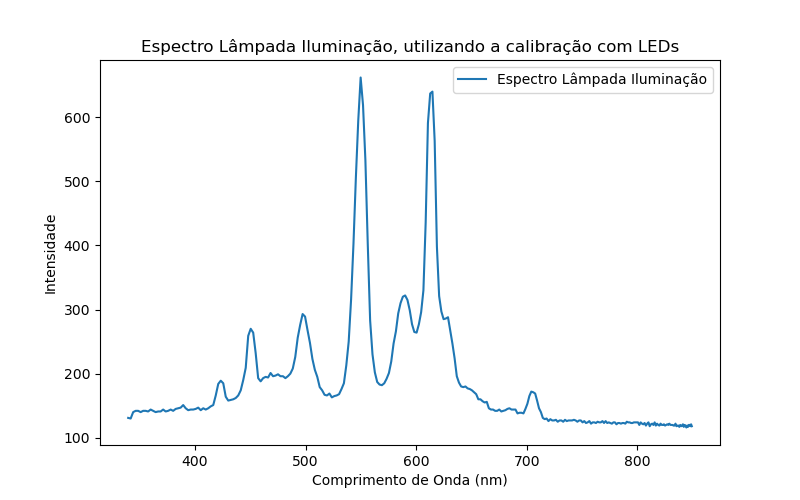

In [5]:
valLampada = np.loadtxt("../Data/LampadaMercurio")
pix = np.arange(0,288)
wavLED = ajLED(pix)


plt.figure(figsize=(8,5))
plt.title("Espectro Lâmpada Iluminação, utilizando a calibração com LEDs")
plt.plot(wavLED,valLampada,label = "Espectro Lâmpada Iluminação")
plt.legend()
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

Este resultado não foi o esperado, faltando riscas intensas esperadas na zona do azul, e tendo obtido riscas entre os 500 e os 700 nm que não correspondem ao mercúrio. Após alguma pesquisa, percebemos que, para iluminação, é comum utilizar uma cobertura de fósforo para tornar a luz mais agradável, mas isso leva a que o espectro obtido esteja alterado, e não seja possível utilizá-lo para a calibração

# 4ª Semana

## Recolha de espectros de lâmpadas de descarga
Recolhemos espectros de emissão de lâmpadas de descarga existentes no laboratório (Mercúrio, Hélio, Néon, Kripton, Árgon)

<IPython.core.display.Javascript object>


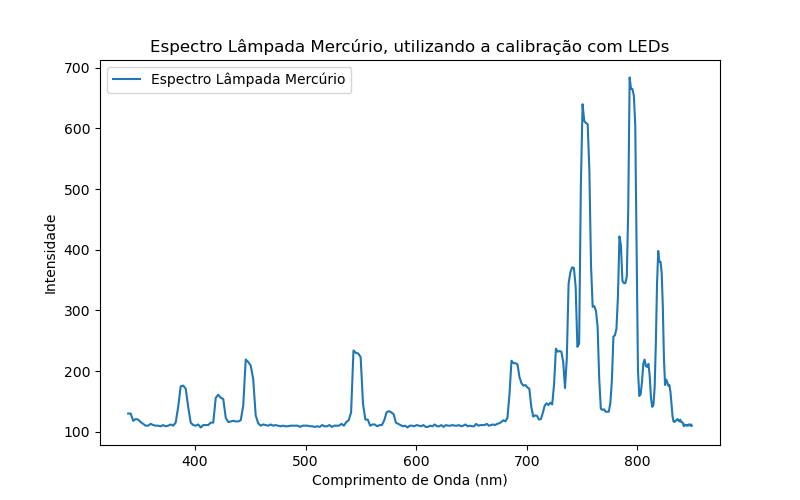

<IPython.core.display.Javascript object>


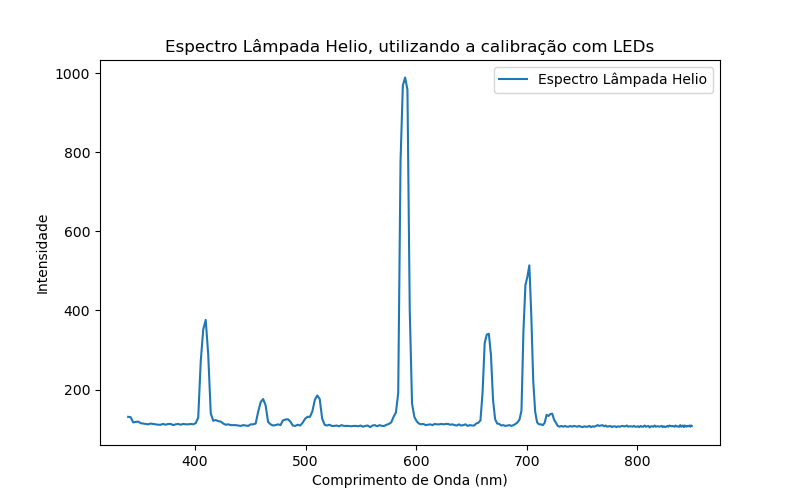

<IPython.core.display.Javascript object>


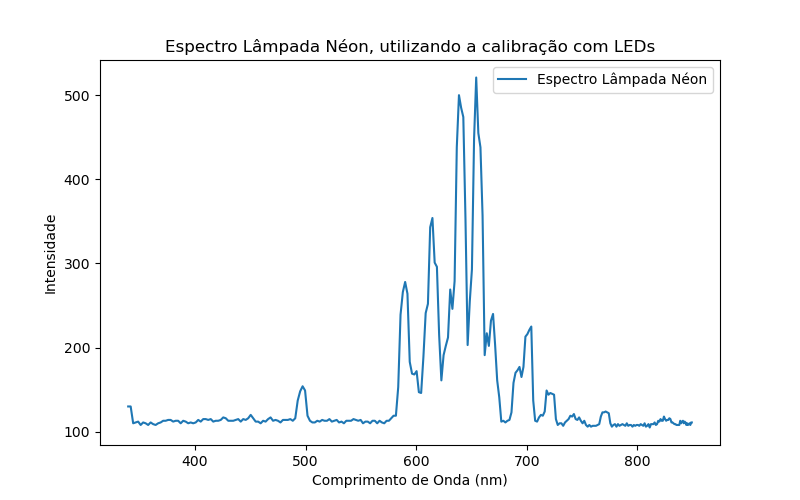

<IPython.core.display.Javascript object>


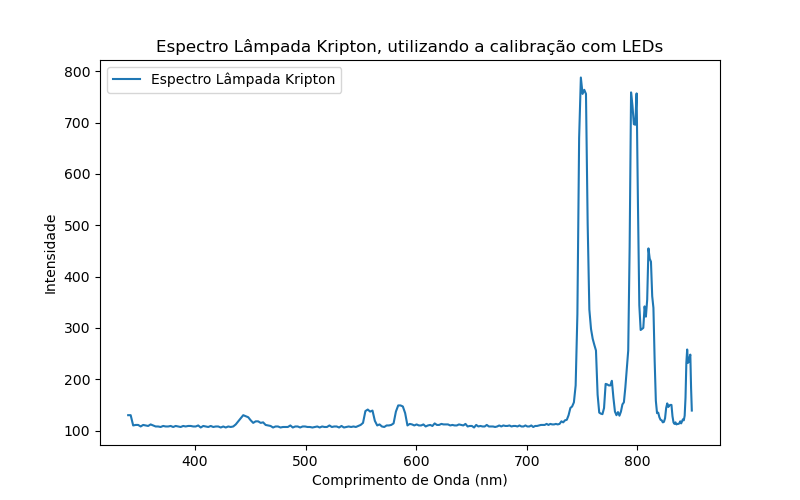

<IPython.core.display.Javascript object>


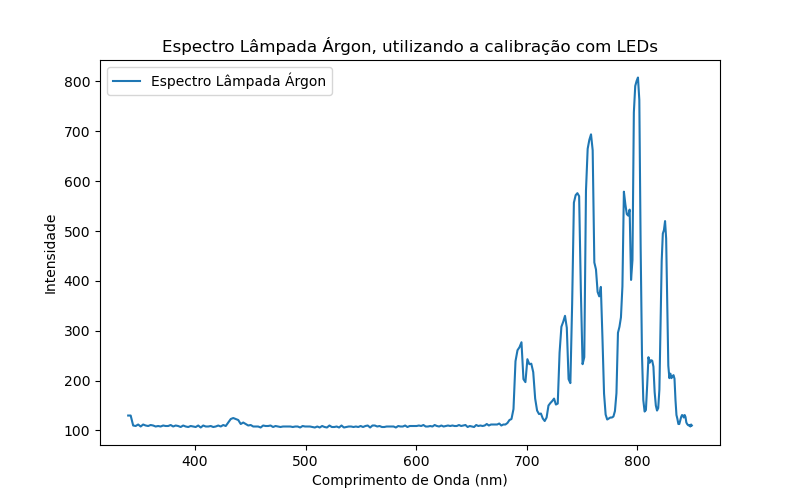

In [6]:
valMercurio = np.loadtxt("../Data/Mercurio")
valHelio = np.loadtxt("../Data/Helio")
valNeon = np.loadtxt("../Data/Neon")
valKripton = np.loadtxt("../Data/Kripton")
valArgon = np.loadtxt("../Data/Argon")
pix = np.arange(0,288)
wavLED = ajLED(pix)


plt.figure(figsize=(8,5))
plt.title("Espectro Lâmpada Mercúrio, utilizando a calibração com LEDs")
plt.plot(wavLED,valMercurio,label = "Espectro Lâmpada Mercúrio")
plt.legend()
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

plt.figure(figsize=(8,5))
plt.title("Espectro Lâmpada Helio, utilizando a calibração com LEDs")
plt.plot(wavLED,valHelio,label = "Espectro Lâmpada Helio")
plt.legend()
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

plt.figure(figsize=(8,5))
plt.title("Espectro Lâmpada Néon, utilizando a calibração com LEDs")
plt.plot(wavLED,valNeon,label = "Espectro Lâmpada Néon")
plt.legend()
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

plt.figure(figsize=(8,5))
plt.title("Espectro Lâmpada Kripton, utilizando a calibração com LEDs")
plt.plot(wavLED,valKripton,label = "Espectro Lâmpada Kripton")
plt.legend()
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

plt.figure(figsize=(8,5))
plt.title("Espectro Lâmpada Árgon, utilizando a calibração com LEDs")
plt.plot(wavLED,valArgon,label = "Espectro Lâmpada Árgon")
plt.legend()
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

Destes espectros, vemos que o do Hélio tem riscas bastante pronunciadas ao longo da gama, que podemos utilizar para calibração, em conjunto com, por exemplo, o Árgon, para completar a zona do vermelho. Iremos assim obter uma calibração melhor do que a obtida com os LEDs.

No entanto, nestes espectros, encontrámos algumas anomalias, pois não obtivemos algumas riscas de alta intensidade segundo os dados do NIST, que planaeamos utilizar para no final detetar os elementos.

## Pós-Aula
Fomos ao laboratório recolher dados extra, com os espectrómetros *SpectraScan* VIS-NIR e UV-VIS, para comparar com os nossos dados. Analisando e comparando os espectros, percebemos que a sensibilidade espectral não é como indicada pela marca, com maior sensibilidade no azul, mas sim o contrário, com bastante mais sensibilidade na zona do vermelho, e pouca sensibilidade no azul. Percebemos isto pois observando os espectros obtidos, riscas pouco intensas no vermelho apareciam muito intensas, enquanto riscas mais intensas no azul não apareciam tão intensas.

# 5ª Semana

## Ajuste
Foi feito o ajuste final, utilizando picos do hélio e do árgon, de forma a cobrir mais ou menos a gama toda igualmente:

315.57001167007337 + 2.17551118793287·x¹ + 0.008588338277613293·x² -
8.62291127124621e-05·x³ + 2.9828358440805296e-07·x⁴ -
3.9133329397982944e-10·x⁵


<IPython.core.display.Javascript object>


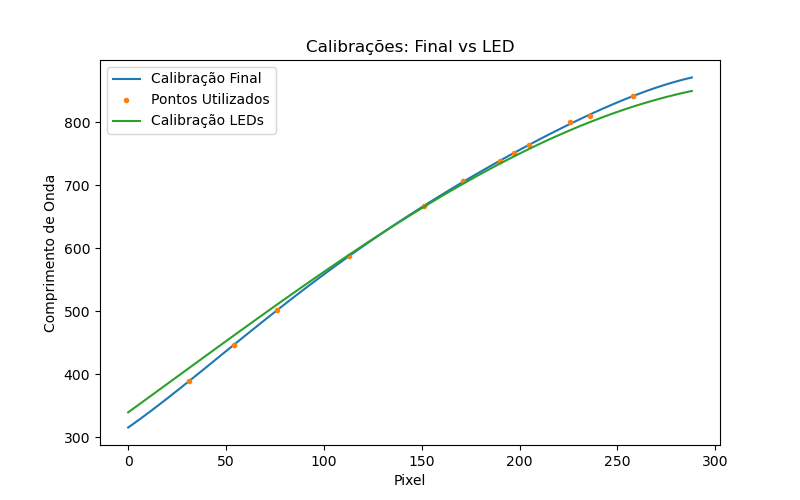

In [7]:
FinalPix = np.array([ 31, 54, 76, 113, 151, 171,190,197,205, 258,226,236]) # pixeis para o ajuste
FinalWav = np.array((388.86,447.14,501.56,587.56,667.81,706.51,738.4,750.93,763.51,842,801,811)) # wavelenghts
deg= 5 # 5º grau dá bons resultados

aj= np.polyfit(FinalPix,FinalWav,deg)[::-1]
ajFinal = np.polynomial.polynomial.Polynomial( aj )
print(ajFinal)

nx = np.linspace(0,288,100)
plt.figure(figsize=(8,5))
plt.title("Calibrações: Final vs LED")
plt.plot(nx,ajFinal(nx),label="Calibração Final")
plt.plot(FinalPix,FinalWav,'.',label="Pontos Utilizados")
plt.plot(nx,ajLED(nx),label="Calibração LEDs")
plt.xlabel("Pixel")
plt.ylabel("Comprimento de Onda")
plt.legend()
plt.show()

## Convolução
A ideia desta técnica seria utilizar os dados do NIST, e fazendo a convolução com uma gaussiana, simular os dados que esperariamos encontrar na medição com o nosso espectrómetro, e assim, por comparação dos dois espectros (ou por comparação dos picos obtidos em ambos, é talvez mais fácil), perceber qual o elemento. A vantagem deste método é a facilidade de adicionar novos elementos à biblioteca de deteção.

Para tal, começamos por tentar determinar as características do nosso espectrómetro, e para tal utilizamos o espectro do hélio, pois tem os picos isolados e bastante claros:

sig = 3.443975484347286
err sig =  0.16282628050083375
med =  587.486001794752
err med =  0.15340669561567305
vol =  994.9025292702644
err vol =  39.17995688955983
b =  106.86477369885999
b_Err =  11.150104131871654
r2 =  0.969376885082086
variance =  49.22757182731302
2s =  98.45514365462604


<IPython.core.display.Javascript object>


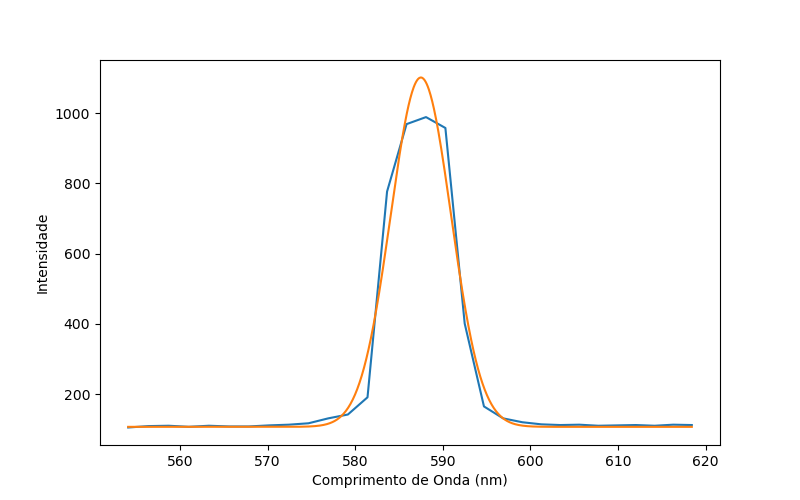

sig = 3.249055065134341
err sig =  0.16323840512617402
med =  387.94072758082734
err med =  0.14720091088042048
vol =  280.1382550035512
err vol =  11.405022995282588
b =  112.41861364222079
b_Err =  4.301643702888238
r2 =  0.982001251413732
variance =  12.300099656265571
2s =  24.600199312531142


<IPython.core.display.Javascript object>


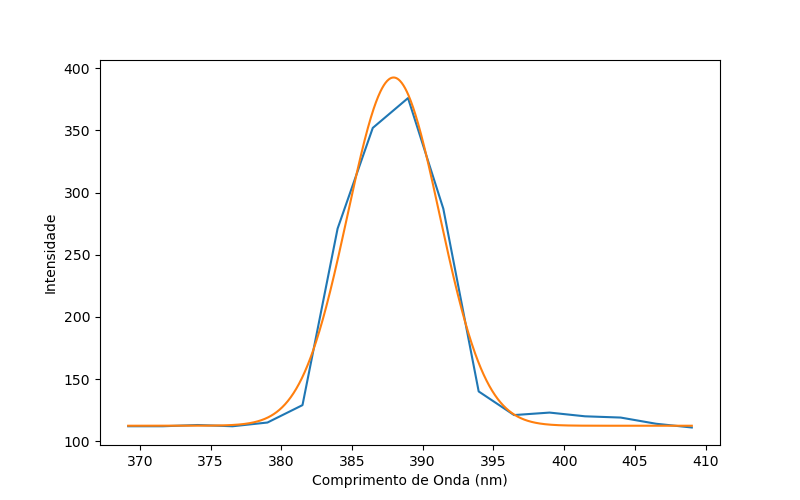

sig = 3.2678540877276308
err sig =  0.1468086537823077
med =  666.1469194606628
err med =  0.12769574691386465
vol =  256.4562083832743
err vol =  9.132398229460632
b =  107.78564437445564
b_Err =  4.019694850897656
r2 =  0.9843555978858167
variance =  11.039407234134714
2s =  22.078814468269428


<IPython.core.display.Javascript object>


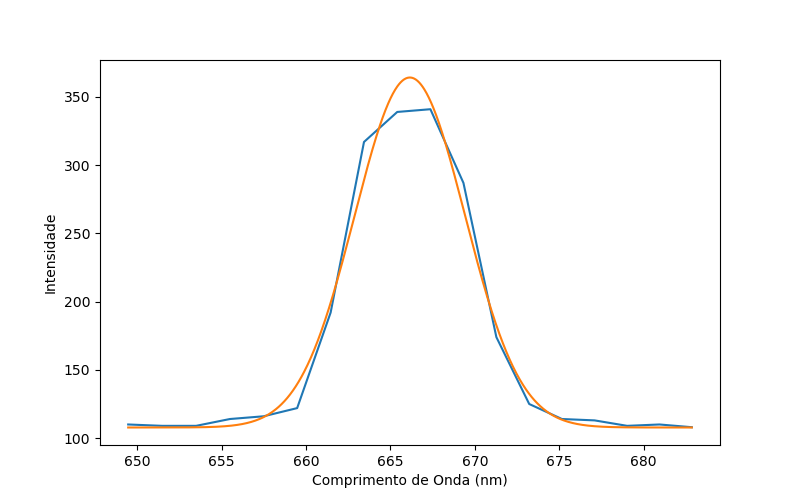

sig = 3.3472121743942607
err sig =  0.17676719808372013
med =  703.9186186161389
err med =  0.14792283911482237
vol =  428.60634978795497
err vol =  17.564894188577313
b =  105.01793653547621
b_Err =  8.823326742788987
r2 =  0.9800008326391046
variance =  21.643836155415574
2s =  43.28767231083115


<IPython.core.display.Javascript object>


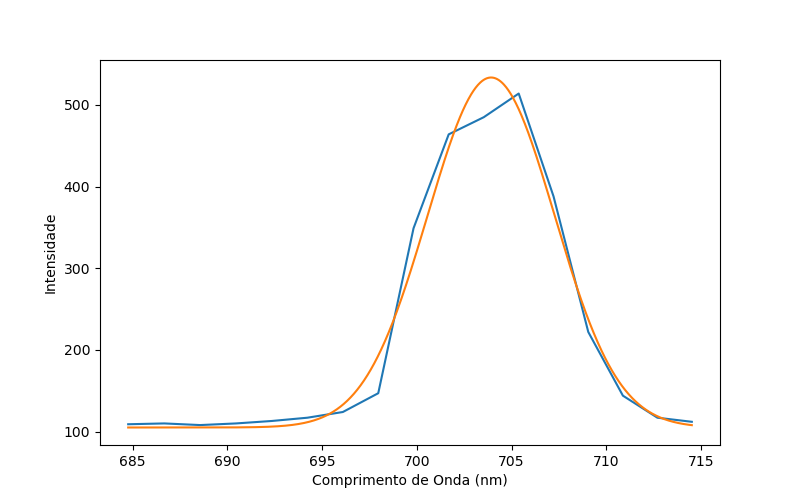

Sigma =  3.32702420290088
Incerteza =  0.08137820564869308


In [8]:
def gauss(x,sig,med,vol,b):
    return vol * np.exp(-1/2 * ((x-med)/sig)**2)+b

def r2_func(f,xdata,ydata,*params):
    'Calcula o r quadrado, onde params sao os elementos obtidos no popt'
    residuals = ydata - f(xdata,*params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata - np.mean(ydata))**2)
    r_squared = 1 - ss_res / ss_tot
    return r_squared

def variance_func(f,xdata,ydata,*params):
    'Calcula a variancia, onde params sao os elementos obtidos no popt'
    residuals = ydata - f(xdata,*params)
    return np.sqrt(np.sum(residuals**2)/(xdata.size-1))

def ajuste(pontosx,pontosy,guess):
    pontosxajuste = np.linspace(pontosx[0],pontosx[-1],1000)
    
    # Regressao
    popt,pcov = opt.curve_fit(gauss,pontosx,pontosy,p0=guess)
    sig,med,vol,b = popt
    sig_Err = np.sqrt(pcov[0,0])
    med_Err = np.sqrt(pcov[1,1])
    vol_Err = np.sqrt(pcov[2,2])
    b_Err = np.sqrt(pcov[3,3])
    r2 = r2_func(gauss,pontosx,pontosy,sig,med,vol,b)
    variance = variance_func(gauss,pontosx,pontosy,sig,med,vol,b)
    
    # Imprimir valores relevantes
    print('sig =',sig)
    print('err sig = ',sig_Err)
    print('med = ',med)
    print('err med = ',med_Err)
    print('vol = ',vol)
    print('err vol = ',vol_Err)
    print('b = ',b)
    print('b_Err = ',b_Err)
    print('r2 = ',r2)
    print('variance = ',variance)
    print('2s = ',2*variance)
    
    return sig,med,vol,b,sig_Err

pontosx = ajFinal(pix[98:128])
pontosy = valHelio[98:128]
pontosxajuste = np.linspace(pontosx[0],pontosx[-1],1000)
guess = [5 ,580, 9500,100]
sig1,med,vol,b,sig1_Err = ajuste(pontosx,pontosy,guess)
plt.figure(figsize=(8,5))
plt.plot(pontosx,pontosy)
plt.plot(pontosxajuste,gauss(pontosxajuste,sig1,med,vol,b))
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

pontosx = ajFinal(pix[23:40])
pontosy = valHelio[23:40]
pontosxajuste = np.linspace(pontosx[0],pontosx[-1],1000)
guess = [5 ,387, 15*250,100]
sig2,med,vol,b,sig2_Err = ajuste(pontosx,pontosy,guess)
plt.figure(figsize=(8,5))
plt.plot(pontosx,pontosy)
plt.plot(pontosxajuste,gauss(pontosxajuste,sig2,med,vol,b))
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

pontosx = ajFinal(pix[142:160])
pontosy = valHelio[142:160]
pontosxajuste = np.linspace(pontosx[0],pontosx[-1],1000)
guess = [5 ,666, 15*250,100]
sig3,med,vol,b,sig3_Err = ajuste(pontosx,pontosy,guess)
plt.figure(figsize=(8,5))
plt.plot(pontosx,pontosy)
plt.plot(pontosxajuste,gauss(pontosxajuste,sig3,med,vol,b))
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

pontosx = ajFinal(pix[160:177])
pontosy = valHelio[160:177]
pontosxajuste = np.linspace(pontosx[0],pontosx[-1],1000)
guess = [3 ,705, 10*400,100]
sig4,med,vol,b,sig4_Err = ajuste(pontosx,pontosy,guess)
plt.figure(figsize=(8,5))
plt.plot(pontosx,pontosy)
plt.plot(pontosxajuste,gauss(pontosxajuste,sig4,med,vol,b))
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade")
plt.show()

# Calcular o sigma final como a média dos sigmas
sigma = np.average((sig1,sig2,sig3,sig4))
sigmaError = np.sqrt(sig1_Err**2 + sig2_Err**2 + sig3_Err**2 + sig4_Err**2)/4
print("Sigma = ",sigma)
print("Incerteza = ",sigmaError)

Assim, concluimos que o $\sigma = 3.33 \pm 0.08$.

Relativamente à convolução, tivemos primeiro de passar os dados do NIST para um formato facilmente legível pelo python:

In [9]:
# Load the spectral lines data
Data_Hg= np.transpose( np.loadtxt("../Data/Lines_Hg.csv", delimiter=";") )
Data_Kr= np.transpose( np.loadtxt("../Data/Lines_Kr.csv", delimiter=";") )
Data_Ne= np.transpose( np.loadtxt("../Data/Lines_Ne.csv", delimiter=";") )
Data_He= np.transpose( np.loadtxt("../Data/Lines_He.csv", delimiter=";") )
Data_Ar= np.transpose( np.loadtxt("../Data/Lines_Ag.csv", delimiter=";") )

<IPython.core.display.Javascript object>


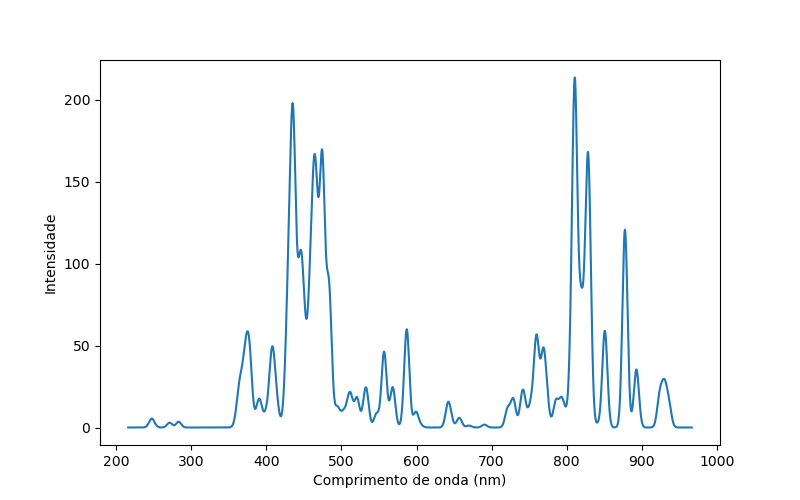

In [10]:
def FullConv(Data):
    """
    -input
    Data: a (2;N) array Data[0] must be the x, Data[0] must be the y

    -output
    Conv_X, Conv
    """
    sigma= 3.38
    def Gauss(x):
        return np.exp(-(x/sigma)**2/2)/(sigma*np.sqrt(2*np.pi))

    L= Data[0][-1]-Data[0][0] 
    N= 10* int(L)
    X= np.linspace(Data[0][0], Data[0][-1], N  )
    Y= np.zeros(N)
    dX= L/(N-1)

    # Creating a map from the original spectral lines list to the new linear one
    ind= np.array((Data[0]-Data[0][0])/dX, dtype=int)

    for i in range(len(Data[0])):
        Y[ind[i]]= Data[1][i]

    # Generating the gaussian (normalized) with a grid with width dX
    # When x = 9*sig the gaussian is ~0 (2.5E-18, the machine limit)
    # We use sig= 3.38 +- 0.08 (determined from the spectrometer data)
    sigma= 3.38

    X_Gauss= np.arange(-9*sigma,9*sigma+dX,dX)
    Y_Gauss= Gauss( X_Gauss)

    Conv = np.convolve(Y, Y_Gauss, mode="full")
    Conv_X= (np.arange(len(Conv))- int(len(X_Gauss)/2))*dX + Data[0][0]

    return Conv_X, Conv

x,y = FullConv(Data_Kr)
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Intensidade")
plt.show()

O exemplo apresentado é o do kripton. Apresentamos em baixo o exemplo do hélio em que os resultados são bastante bons. No entanto, para outros elementos, quando comparado com os dados obtidos, voltamos a ter o problema que já tínhamos apontado antes, de que riscas do NIST não aparecem na prática. Mais fácil será ver as riscas no néon, comparando os resultados obtidos com os previstos (sendo que temos de renormalizar a convolução para estar na mesma escala que os dados experimentais):

<IPython.core.display.Javascript object>


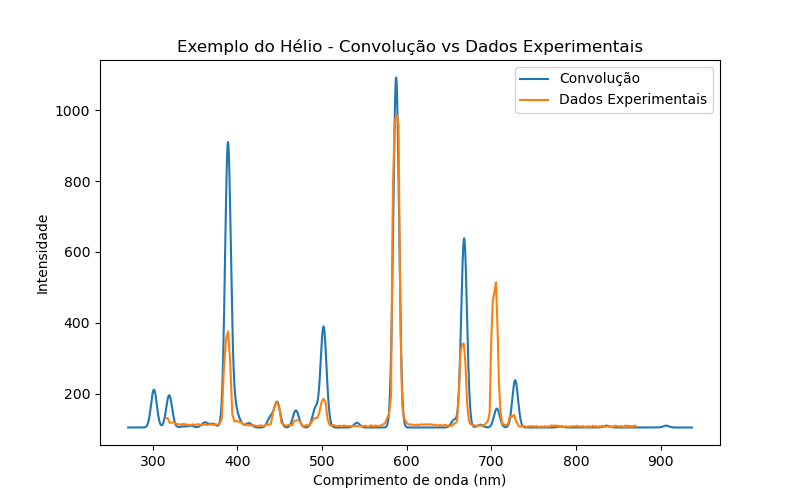

<IPython.core.display.Javascript object>


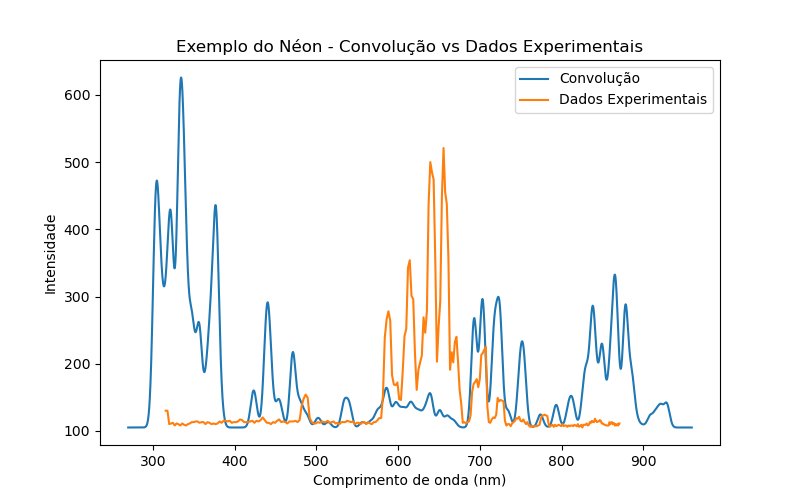

In [11]:
x,y = FullConv(Data_He)
pix = np.arange(0,288)
wav = ajFinal(pix)


plt.figure(figsize=(8,5))
plt.title("Exemplo do Hélio - Convolução vs Dados Experimentais")
plt.plot(x,y * (np.max(valHelio)/np.max(y)) + np.min(valHelio),label = "Convolução")
plt.plot(wav,valHelio, label = "Dados Experimentais")
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Intensidade")
plt.legend()
plt.show()

x,y = FullConv(Data_Ne)
plt.figure(figsize=(8,5))
plt.title("Exemplo do Néon - Convolução vs Dados Experimentais")
plt.plot(x,y * (np.max(valNeon)/np.max(y)) + np.min(valNeon),label = "Convolução")
plt.plot(wav,valNeon, label = "Dados Experimentais")
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Intensidade")
plt.legend()
plt.show()

Assim, este método não poderá ser utilizado para a deteção de elementos. O problema tem duas partes:

Na convolução, as intensidades ficam mal, pois na prática, vários picos juntos de baixa intensidade formam um pico de baixa intensidade mais largo, mas na cnvolução são todos somados, portanto formam um pico mais largo, mas de alta intensidade.

O segundo problema prende-se com os espectros de emissão dependerem da potência utilizada na lâmpada: mais potência permite saltos entre níveis diferentes, e portanto observam-se novas riscas, e deixam de ser observar outras. Assim, precisariamos de dados para a nossa potência específica, e o NIST não tem essa informação.

# Pós Aulas

## Método para deteção de elementos

Após o problema detetado com o NIST, decidimos utilizar como base de dados os espectros obtidos no laboratório, com os espectrómetros *SpectraScan*. Os dados foram tratados, guardando ficheiros que apenas possuem os valores das riscas detetadas. Para a deteção, iteramos sobre cada elemento, e procuramos as riscas no espectro obtido; cada risca presente (dentro de uma incerteza) é um hit, e no final dividimos os hits pelo número de riscas esperadas para ser esse elemento. Isto dá-nos um valor de confiança para cada elemento, no final o valor com mais confiança é o nosso elemento.

Um método semelhante, e talvez melhor, seria utilizar uma espécie de "fingerprint" do elemento, selecionando riscas únicas por elemento, que quando detetadas, indicariam a presença do elemento. Este método tem a vantagem de permitir detetar misturas. Para a implementação, seria necessário identificar esse tal fingerprint por cada elemento, o código poderia ser o mesmo, considerando que acima de determinada confiança, o elemento estava presente.

In [12]:
# Load dos dados para a biblioteca
lib = [[]]

X= np.loadtxt("../Data/1hg.txt", delimiter=";")
indexInt = np.where(X[1] > 100)[0] # Limitar as intensidade, so queremos picos acima de certa intensidade
lib[0] = X[0][indexInt]
X = np.loadtxt("../Data/2he.txt",delimiter=";")
indexInt = np.where(X[1] > 200)[0]
lib.append(X[0][indexInt])
X = np.loadtxt("../Data/3ne.txt",delimiter=";")
X = np.loadtxt("../Data/4kr.txt",delimiter=";")
indexInt = np.where(X[1] > 200)[0]
lib.append(X[0][indexInt])
X = np.loadtxt("../Data/5ar.txt",delimiter=";")
indexInt = np.where(X[1] > 200)[0]
lib.append(X[0][indexInt])


def identify(inputSignalWavelenght,inputSignalIntensity,elementLib):
    # Some important constants
    delta = 2 # Possible error on wavelenght to still consider a hit
    
    # Find the peaks
    indexMaximum = sig.find_peaks(inputSignalIntensity, prominence = 25)
    
    # Array to save confidence
    confidence = []
    
    # Search for elements
    for element in elementLib:
        hits = 0
        for i in indexMaximum[0]:
            minWav = inputSignalWavelenght[i] - delta
            maxWav = minWav + 2*delta
            #print("i")
            #print(inputSignalWavelenght[i])
            for val in element:
                #print(val)
                if minWav <= val and val <= maxWav:
                    hits += 1
                    break
        confidence.append(hits / len(element))
        
    result = confidence.index(max(confidence))
    
    return confidence

pix = np.arange(0,288)
wav = ajFinal(pix)

print(identify(wav,valHelio,lib))

[0.0, 1.0, 0.0, 0.07692307692307693]


O exemplo dado é o da identificação do hélio, em que vemos que a confiança mais alta é o segundo elemento, que corresponde ao Hélio (1-Hg, 2- He, 3-Ne, 4-Kr, 5-Ar)

Houve 3 elementos que revelaram algumas limitações do método. No caso do neon, as riscas no espectro estão muito próximas, ou seja, o espectrómetro *SpectraScan* deteta-as separadas, mas o nosso não. Assim, apesar de detetar todas as riscas no espectro, quando comparado com o número esperado de riscas, a confiança era baixa, e era confundido com outro elemento. A solução foi escolher para a biblioteca apenas os picos mais proeminentes, que eram os detetados.

No caso do Argon/Mercúrio, ocorre algo interessante: para comprimentos entre os 700 e os 900 nm, aproximadamente, os picos coincidem quase completamente. Em baixo está a representação dos dados obtidos com o espectrómetro *SpectraScan*, onde esta semelhança é claramente visível. A solução para este problema foi excluir do mercúrio estes picos mais elevados, utilizando picos na zona do azul que o árgon não possui, e assim é possível distinguí-los

<IPython.core.display.Javascript object>


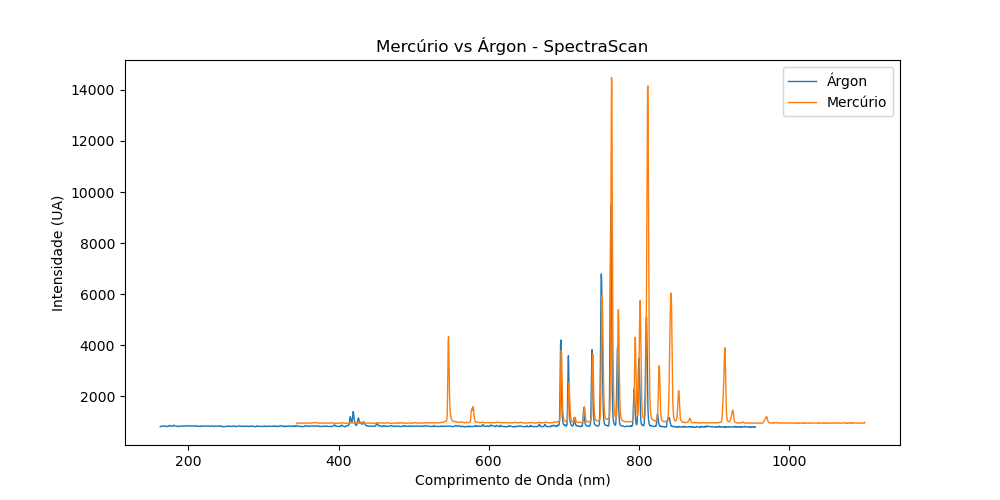

In [14]:
plt.figure(figsize=(10,5))
plt.title("Mercúrio vs Árgon - SpectraScan")

# Load Argon
M = 2047

wavelenght = np.empty(M)
intensidade = np.empty(M)

tmp = pd.read_csv('../DataSpectraScan/scansci0526_5ar.sample', header=None, delim_whitespace=True,skiprows=16)
wavelenght = tmp.loc[:,[1]]
wavelenght = np.array((wavelenght))
intensidade = tmp.loc[:,[2]]
intensidade = np.array((intensidade))
intensidade = intensidade.reshape(2048)

plt.plot(wavelenght,intensidade, label = "Árgon",linewidth=1)


# Load Kr
M = 2047

wavelenght = np.empty(M)
intensidade = np.empty(M)

tmp = pd.read_csv('../DataSpectraScan/scansci0526_1hg_red.sample', header=None, delim_whitespace=True,skiprows=16)
wavelenght = tmp.loc[:,[1]]
wavelenght = np.array((wavelenght))
intensidade = tmp.loc[:,[2]]
intensidade = np.array((intensidade))
intensidade = intensidade.reshape(2048)

plt.plot(wavelenght,intensidade, label = "Mercúrio",linewidth=1)
plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade (UA)")
plt.legend()
#plt.savefig("Imagens/MercurioArgon")
plt.show()